<a href="https://colab.research.google.com/github/amimulhasan/Deep-Learning/blob/main/hybrid_cnn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/MRI_DATA_IMAGE.zip'
extract_to = 'brain_tumor_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Unzipping completed!")

Unzipping completed!


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [ ]:
# Parameters
img_size = 224
batch_size = 32
data_dir = "/content/brain_tumor_data/MRI_DATA_IMAGE"  # Replace with your path

# Load training and validation datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_size, img_size),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_size, img_size),
    batch_size=batch_size
)

# Class names
class_names = train_ds.class_names
print("Class names:", class_names)

# Optimize performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 1176 files belonging to 2 classes.
Using 941 files for training.
Found 1176 files belonging to 2 classes.
Using 235 files for validation.
Class names: ['Normal', 'Tumor Patient']


In [ ]:
import numpy as np

# Convert train dataset to numpy arrays
X_train, y_train = [], []
for images, labels in train_ds:
    X_train.append(images.numpy())
    y_train.append(labels.numpy())

X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)

# Convert validation dataset to numpy arrays
X_val, y_val = [], []
for images, labels in val_ds:
    X_val.append(images.numpy())
    y_val.append(labels.numpy())

X_val = np.concatenate(X_val)
y_val = np.concatenate(y_val)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (941, 224, 224, 3)
y_train shape: (941,)
X_val shape: (235, 224, 224, 3)
y_val shape: (235,)


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import to_categorical
# import numpy as np

# # Load and preprocess MNIST
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape to (28, 28, 1) and normalize
# X_train =X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
# X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# # One-hot encode labels
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)


In [ ]:
from tensorflow.keras.layers import (
    Input, Conv2D, BatchNormalization, Activation, Add,
    MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
)
from tensorflow.keras.models import Model

def residual_block(x, filters):
    shortcut = x
    x = Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)

    if shortcut.shape[-1] != x.shape[-1]:
        shortcut = Conv2D(filters, (1, 1), padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Input layer for 28x28x1 grayscale images
inputs = Input(shape=(224, 224, 3))

x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = BatchNormalization()(x)

x = residual_block(x, 32)
x = MaxPooling2D()(x)

x = residual_block(x, 64)
x = MaxPooling2D()(x)

x = residual_block(x, 128)
x = GlobalAveragePooling2D()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)

outputs =layers.Dense(1, activation='sigmoid')

model = Model(inputs, outputs)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


ValueError: All `outputs` values must be KerasTensors. Received: outputs=<Dense name=dense_11, built=False> including invalid value <Dense name=dense_11, built=False> of type <class 'keras.src.layers.core.dense.Dense'>

In [ ]:
from tensorflow.keras.layers import (
    Input, Conv2D, BatchNormalization, Activation, Add,
    MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
)
from tensorflow.keras.models import Model

def residual_block(x, filters):
    shortcut = x
    x = Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)

    if shortcut.shape[-1] != x.shape[-1]:
        shortcut = Conv2D(filters, (1, 1), padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

inputs = Input(shape=(224, 224, 3))

x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = BatchNormalization()(x)

x = residual_block(x, 32)
x = MaxPooling2D()(x)

x = residual_block(x, 64)
x = MaxPooling2D()(x)

x = residual_block(x, 128)
x = GlobalAveragePooling2D()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)

outputs = Dense(1, activation='sigmoid')(x)  # <-- fixed line

model = Model(inputs, outputs)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 224, 224,  │        896 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        128 │ conv2d_36[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 224, 224,  │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        128 │ conv2d_37[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 224, 224,  │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        128 │ conv2d_38[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 224, 224,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_12       │ (None, 224, 224,  │          0 │ add_12[0][0]      │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 112, 112,  │          0 │ activation_12[0]… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 112, 112,  │     18,496 │ max_pooling2d_8[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_39[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 112, 112,  │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 112, 112,  │      2,112 │ max_pooling2d_8[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_40[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_41[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_13 (Add)        │ (None, 112, 112,  │          0 │ batch_normalizat

 Total params: 334,209 (1.27 MB)

 Trainable params: 332,865 (1.27 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # <--- for 2 classes
    metrics=['accuracy']
)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, lr_scheduler]
)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 560s 46s/step - accuracy: 0.7570 - loss: 0.5513 - val_accuracy: 0.8201 - val_loss: 3.5265 - learning_rate: 0.0010
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 569s 47s/step - accuracy: 0.8309 - loss: 0.4559 - val_accuracy: 0.8201 - val_loss: 1.3046 - learning_rate: 0.0010
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 547s 46s/step - accuracy: 0.8279 - loss: 0.4464 - val_accuracy: 0.8201 - val_loss: 1.1350 - learning_rate: 0.0010
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 568s 46s/step - accuracy: 0.8140 - loss: 0.4396 - val_accuracy: 0.8201 - val_loss: 0.8027 - learning_rate: 0.0010
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 561s 46s/step - accuracy: 0.8098 - loss: 0.4391 - val_accuracy: 0.8201 - val_loss: 0.7076 - learning_rate: 0.0010
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 545s 45s/step - accuracy: 0.8564 - loss: 0.3714 - val_accuracy: 0.8201 - val_loss: 0.5227 - learning_rate: 0.0010
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 546s 43s/step - accuracy: 0.8283 - loss: 0.3922 - 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Training
model.fit(
   X_train,y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, lr_scheduler]
)


Epoch 1/30


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 10)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9930 - loss: 0.0203
Test Accuracy: 99.46%


In [ ]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# === Make Predictions ===
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
# === Compute Metrics ===
acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
kappa = cohen_kappa_score(y_true, y_pred)

In [ ]:
# === Print Metrics ===
print(f"Accuracy      : {acc:.4f}")
print(f"Precision     : {precision:.4f}")
print(f"Recall        : {recall:.4f}")
print(f"F1 Score      : {f1:.4f}")
print(f"Cohen's Kappa : {kappa:.4f}")

Accuracy      : 0.9946
Precision     : 0.9946
Recall        : 0.9946
F1 Score      : 0.9946
Cohen's Kappa : 0.9940


In [ ]:
# === Full Classification Report (Optional) ===
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# === Confusion Matrix ===
cm = confusion_matrix(y_true, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       1.00      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



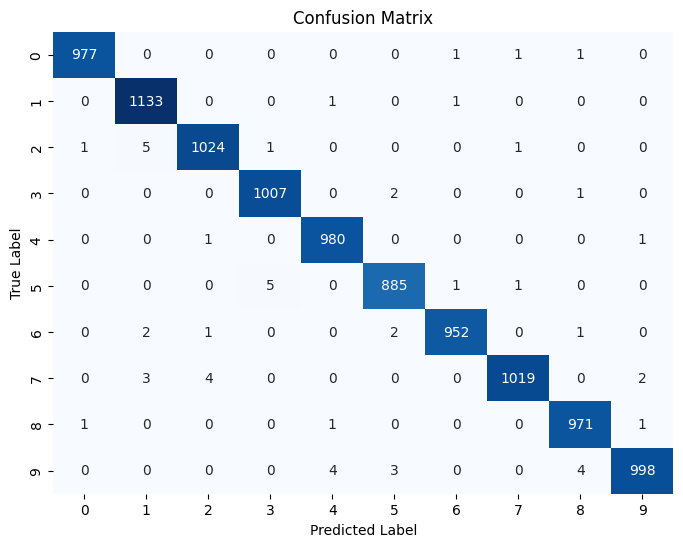

In [ ]:
# === Plot Confusion Matrix ===
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()